<a href="https://colab.research.google.com/github/JPedro2/ImageClassificationWorkshop/blob/master/model_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
train_labels = train_labels.reshape(train_labels.shape[0], 1)

test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
test_labels = test_labels.reshape(test_labels.shape[0], 1)

# Add Dropout Layer

In [5]:
model = keras.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (5,5),activation ='relu', padding='same', 
                            input_shape = (28,28,1)),
        keras.layers.MaxPooling2D(pool_size=(2,2)),    
        # Add Dropout Layer
        keras.layers.Dropout(rate=0.5),

        keras.layers.Flatten(),
        keras.layers.Dense(512, activation = "relu"),
        # Add Dropout Layer
        keras.layers.Dropout(rate=0.5),
        keras.layers.Dense(10, activation = "softmax")])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2) # Try with 2

In [8]:
from time import time

tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(time()))

history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2, callbacks=[earlystop, tensorboard])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 11s 236us/sample - loss: 0.4603 - acc: 0.8347 - val_loss: 0.3152 - val_acc: 0.8862
Epoch 2/20
48000/48000 [==============================] - 8s 173us/sample - loss: 0.3362 - acc: 0.8784 - val_loss: 0.2855 - val_acc: 0.8942
Epoch 3/20
48000/48000 [==============================] - 8s 169us/sample - loss: 0.2965 - acc: 0.8907 - val_loss: 0.2656 - val_acc: 0.9009
Epoch 4/20
48000/48000 [==============================] - 8s 167us/sample - loss: 0.2751 - acc: 0.8983 - val_loss: 0.2593 - val_acc: 0.9027
Epoch 5/20
48000/48000 [==============================] - 8s 166us/sample - loss: 0.2580 - acc: 0.9049 - val_loss: 0.2540 - val_acc: 0.9061
Epoch 6/20
48000/48000 [==============================] - 8s 166us/sample - loss: 0.2414 - acc: 0.9101 - val_loss: 0.2602 - val_acc: 0.9048
Epoch 7/20
48000/48000 [==============================] - 8s 166us/sample - loss: 0.2264 - acc: 0.9164 - val_

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.2574 - acc: 0.9105
Test accuracy: 0.9105


# Plot Accuracy over time for comparison

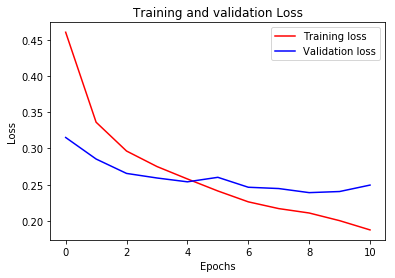

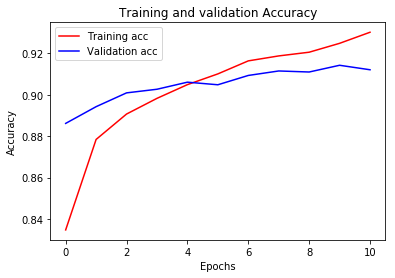

In [10]:
#model.fit() returns a History object that contains a dictionary with everything that happened during training:
history_dict = history.history
history_dict.keys()

# There are four entries: one for each monitored metric during training and validation. 
# We can use these to plot the training and validation loss and accuracy for comparison.
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

#epochs = range(1, len(acc) + 1)
epochs = range(len(acc))


# "r" is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.show()

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.show()

### Conclusion
It does now seem that with this Convolutional Neural Network and all the hyper-parameters that we have tunned along the way, we are able to produce a robust model with good enough loss and accuracy in just around 10 _epochs_.

There is no right or wrong answer! **I would highly recommend** that you play with some of the _hyper-parameters_ (like `dropout`, `validation_split`, `patience`, `filters`, etc) and even add more Convolution and Neural Network layers (by copying and pasting the existing ones, for example) to find out if you can achieve a better model.

[Prev](https://github.com/JPedro2/ImageClassificationWorkshop/blob/master/model_3.ipynb) - Next